# Shopify Technical Challenge Submission
Created by: LAM XUAN TAM  

Below, you can find my succinct answers for the mandatory Data Science Intern Challenge (Winter 2022).

* [QUESTION_1> DATA ANALYSIS](#part_1) 
    + [Python Programming](#part_1)
    + [Task Answers](#part_1a)  

* [QUESTION_2> SQL QUERY](#part_2)  
    + [Task_a answer](#part_2a)  
    + [Task_b answer](#part_2b)
    + [Task_c answer](#part_2c)

# QUESTION_1> DATA ANALYSIS <a id="part_1"></a>
Dataset was collected from public googlesheet using "requests" packages and analyzed using "pandas" package. 

Dataset was overviewd and distributions of numerical data was checked to answer task questions.

In [1]:
# IMPORT PACKAGES FOR PROJECT
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import requests

# GET DATA
link = 'https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0' # dataset link
r = requests.get('/'.join([*link.split('/')[:-1], 'export?format=csv'])) # request dataset as csv format
df = pd.read_csv(BytesIO(r.content)) # import dataset as pandas dataframe

# OVERVIEW DATAFRAME
print('+ OVERVIEW DATAFRAME')
print(df.info())
print('+ NUMBER OF DUPLICATED ROWS:', sum(df.duplicated()))
print()
print('+ FIRST AND LAST 5 ROWS:')
display(df.drop(df.index[5:-5]))

+ OVERVIEW DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB
None
+ NUMBER OF DUPLICATED ROWS: 0

+ FIRST AND LAST 5 ROWS:


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


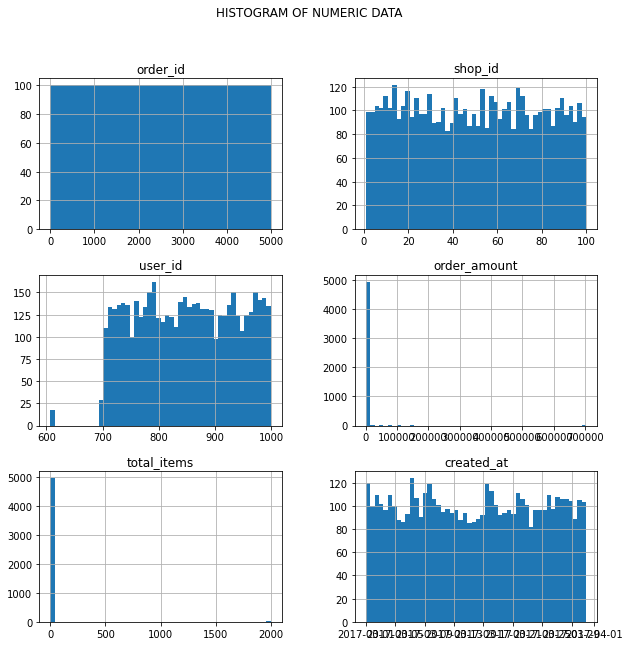

+ OVERVIEW NUMERIC DATA DISTRIBUTIONS:


,order_id,shop_id,user_id,order_amount,total_items,created_at
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,2017-03-15 22:20:37.076199936
min,1.000000,1.000000,607.000000,90.000000,1.00000,2017-03-01 00:08:09
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,2017-03-08 07:08:03.750000128
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,2017-03-16 00:21:20.500000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,2017-03-23 10:39:58.249999872
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,2017-03-30 23:55:35
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,NaN


In [2]:
df['created_at'] = pd.to_datetime(df['created_at']) # change datetime datatypes

# overview distribution of all numeric data
df.hist(bins=50, figsize=(10,10))
plt.suptitle('HISTOGRAM OF NUMERIC DATA')
plt.show()
print('+ OVERVIEW NUMERIC DATA DISTRIBUTIONS:')
display(df.describe(datetime_is_numeric=True))

# Analysis of the average order value (AOV) over a 30 day window: <a id="part_1a"></a>
*There is no need to query data for nearest 30 days as all records were within 01.03.2017 - 30.03.2017.*  

The AOV or mean of `order_amount` is $3145.13  

(a)   
However, **distributions of `order_amount` and `total_items` are heavily skewed** due to some amount of extremely big orders.  
These extremely big orders (up to $704000) are not common but can raise the average values significantly. 

(b)  
In this case, the average isn't a good measure to evaluate the typical order size.  
The **median** or middle value of distribution is better for descriptive summary of our dataset. 

(c)  
A typical order have value around **$284**.  

# QUESTION_2> SQL QUERY <a id="part_2"></a>

## Task_a <a id="part_2a"></a>
### ANSWER: 54 orders were shipped by Speedy Express in total.

In [ ]:
/*
count number of orders for all ShipperID with the name "Speedy Express"
sum up the values for final result
*/
SELECT SUM(count) as Speedy_Express_n_orders --sum up
FROM (	SELECT COUNT(OrderID) as count --count for each ShipperID
		FROM Orders
		WHERE ShipperID IN (SELECT ShipperID FROM Shippers WHERE ShipperName='Speedy Express')--select ShipperID
		GROUP BY ShipperID	)		
;

## Task_b <a id="part_2b"></a>
### ANSWER: "Peacock" is the last name of the employee with the most orders.

In [ ]:
/*
count number of orders for each employee, get the highest value
show all employees Lastname having n_orders equal to the highest value.
*/
SELECT LastName as Employees_with_max_orders --get Lastname
FROM Orders LEFT JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Orders.EmployeeID
HAVING COUNT(OrderID)=( SELECT MAX(count) --get max count
                        FROM (  SELECT  EmployeeID, COUNT(OrderID) AS count --count for each employees
                                FROM    Orders
                                GROUP BY EmployeeID )   )
;

## Task_c <a id="part_2c"></a>
### ANSWER: ProductID 40 - "Boston Crab Meat" was ordered the most in quantity by customers in Germany.

In [ ]:
/*
select only orders from German customer, sum ordered quantity for each ProductID and get highest value
repeat subquery to select only orders from German customer
show ProductName of ProductID having sum_quantity equal to the highest value
*/
SELECT Products.ProductID AS ProductID_most_ordered_by_German, ProductName
FROM OrderDetails LEFT JOIN Products ON Products.ProductID = OrderDetails.ProductID
WHERE OrderID IN (      SELECT OrderID --select orders from German customer
	                FROM Orders 
                        WHERE CustomerID IN (SELECT CustomerID FROM Customers WHERE Country='Germany'))
GROUP BY Products.ProductID
HAVING SUM(quantity) = (
        SELECT MAX(sum) --get max ordered quantity
        FROM (  SELECT SUM(Quantity) as sum --sum ordered quantity
                FROM OrderDetails
                WHERE OrderID IN (      SELECT OrderID --select orders from German customer
	                                FROM Orders 
                                        WHERE CustomerID IN (SELECT CustomerID FROM Customers WHERE Country='Germany')  )
                GROUP BY ProductID )
)
;

In [ ]:
/*
ALTERNATIVE:
avoid repeated subquery by sorting sum_quantity in descending orders and showing first few results.
*/
SELECT Products.ProductID, ProductName, SUM(Quantity) as Total_ordered_quantity_by_German
FROM OrderDetails LEFT JOIN Products ON Products.ProductID = OrderDetails.ProductID
WHERE OrderID IN (  SELECT OrderID --select orders from German customer
	                FROM Orders 
                    WHERE CustomerID IN (SELECT CustomerID FROM Customers WHERE Country='Germany'))
GROUP BY Products.ProductID
ORDER BY SUM(Quantity) DESC --sort sum_quantity in descending order
LIMIT 5 --show top 5 result
;

---
*end*